<a href="https://colab.research.google.com/github/paulsubarna/BLIP/blob/main/DGM_tutorial_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 4: Variational AutoEncoder (Cont.)

We will continue with our implementation of VAEs. The previous tutorial gave us an overview of the steps to model a vanilla VAE. In this tutorial, we will try to delve a bit deeper into the architectures, exploring complex architectures to build our encoder and decoder modules and also try to answer some analytical questions !!

References:
https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

## Convolutional VAEs

TO-DO:
1. Recreate the VAE model with convolutional layers in the Encoder and the Decoder


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VAE(nn.Module):

  def __init__(self, in_channels, out_channels, latent_dim):
    super(VAE, self).__init__()

    self.latent_dim = latent_dim
    self.in_channels = in_channels
    self.out_channels = out_channels

    modules = []

    hidden_dims = [32, 64, 128, .... ]


    ### Construct your Encoder

    ### Construct your decoder


    # Upsample the decoder output to match 28x28 size



  def encode(self, x):
    latent_ = self.encoder(x)
    latent_ = torch.flatten(latent_, start_dim=1)
    mu = self.mu(latent_)
    log_var = self.log_var(latent_)
    return mu, log_var


  def decode(self, z):
    result = self.decoder_input(z)
    result = result.view(-1, 512, 2, 2)
    result = self.decoder(result)
    x_ = self.final_layer(result)
    return x_

  def reparameterize(self, mu, log_var):
    std = torch.exp(0.5 * log_var)
    eps = torch.randn_like(std)
    z = mu + eps * std
    return z

  def sample(self, num_samples):
    z = torch.randn(num_samples, self.latent_dim)
    samples = self.decode(z)
    return samples

  def generate(self, x):
    return self.forward(x)[0]


  def forward(self,x):

    return x_reconstructed, mu, log_var

  def loss_function(self, x, recons, mu, log_var):
    reconstruction_loss =
    kl_divergence =
    return reconstruction_loss + kl_divergence


## Dataset Loading: Mnist

1. In this work, you will load Mnist dataset from torchvision.
2. Follow the same steps from the previous tutorials to load and preprocess the dataset

Reference:
https://docs.pytorch.org/vision/stable/datasets.html

In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from torchvision import transforms



100%|██████████| 9.91M/9.91M [00:01<00:00, 4.99MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 131kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.23MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 14.9MB/s]


In [ ]:
from tqdm import tqdm
def train(model, train_loader, optimizer, epoch, device):
  model.train()
  running_loss = 0.0
  for e in range(epoch):
    for batch_idx, batch in tqdm(enumerate(train_loader)):
      data, _ = batch
      data = data.to(device)
      (out, mu, log_var) = model(data)
      loss = model.loss_function(data,out, mu, log_var)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      running_loss += loss.item()

    print(f'loss after {e} epochs: {running_loss/(batch_idx+1)}')
    running_loss = 0.0
  return model


def test(model, test_loader, device):
  model.eval()
  test_loss = 0
  with torch.no_grad():
    for data, _ in test_loader:
      data = data.to(device)
      (out, mu, log_var) = model(data)
      test_loss += model.loss_function
      test_loss /= len(test_loader.dataset)
  print(f'Test loss: {test_loss}')






## Define your Hyperparameters


In [ ]:
lr =
epoch=
latent_dim =
in_channels =
out_channels =
device = torch.device('cuda')
model = VAE(in_channels=in_channels, out_channels=out_channels, latent_dim=20)
model.to('cuda')
train(model, train_loader, optim.Adam(model.parameters(), lr=lr), epoch, device)

## Visualizaion

1. Compare the Real and Generated Images from your VAE model


In [ ]:
import matplotlib.pyplot as plt

data = next(iter(test_loader))[0]#.to(device)
recons = model.generate(data.to(device))

fig, axs = plt.subplots(4, 4)
for i, ax in enumerate(axs.flatten()):
  ax.imshow(data[i].cpu().detach().numpy().squeeze(), cmap='gray')
plt.show()

fig1, axs1 = plt.subplots(4, 4)

for i, ax in enumerate(axs1.flatten()):
  ax.imshow(recons[i].cpu().detach().numpy().squeeze(), cmap='gray')

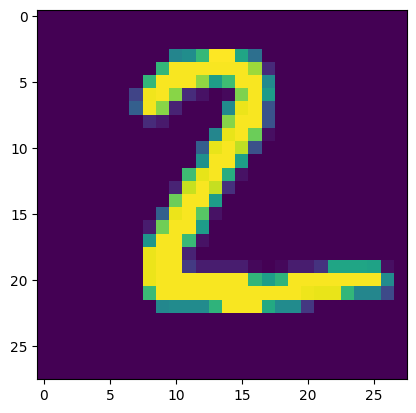

In [ ]:
#data = next(iter(test_loader))#.to(device)
plt.imshow(data[1][0])#.shape
#data[0].shape

## Aggregate Posterior

1. Now that you have a trained VAE model, iterate through the entire dataset, testset or validation set, to compute your aggregate posterior.
2. If the dimension is greater than 2, reduce the dimension using PCA or TSNE and visualize it in a scatter plot.
3. Now that you have produced the scatter plot, pick random samples from posterior, typically one closer to mean and one farther away.
4. Compare the generated image from these two distinct randomly sample point using your trained decoder and comment your findings !!


In [ ]:
## TO-DO